<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/PCA%2C_MDS_%26_t_SNE(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA, MDS & t-SNE

## Preparación de ambiente

### Carga de módulos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Conjunto de datos

### Lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel('Consumo Gasolina Autos Ene 2018.xlsx')

In [ ]:
df

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.00,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,5,10,9
1,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.00,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9
2,FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.00,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9
3,FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,2018,AUT,Gasolina,4,188,2.00,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9
4,FORD,FUSION,HYBRID 4PTS 2.5L 4CIL 156HP CVT,2011,CVT,Gasolina,4,156,2.50,AUTOS COMPACTOS,24.00,21.90,23.01,17.26,135,5,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,LAND ROVER,RANGE ROVER,SUPERCARGADA 5PTS 5.0L 506HP AUT,2012,AUT,Gasolina,8,506,5.00,CAMIONETAS DE USO MULTIPLE (SUV),4.42,9.60,6.97,5.22,446,39,0,?
4613,LAND ROVER,RANGE ROVER,SUPERCARGADA 5PTS 5.0L 8CIL 506HP AUT,2013,AUT,Gasolina,8,506,5.00,CAMIONETAS DE USO MULTIPLE (SUV),4.42,9.60,6.97,5.22,446,39,0,?
4614,MERCEDES,G 65,AMG 4X4 5PTAS 6.0L 12CIL 630HP AUT BITURBO,2016,AUT,Gasolina,12,630,5.98,CAMIONETAS DE USO MULTIPLE (SUV),4.41,7.30,6.45,4.84,482,38,0,?
4615,MERCEDES,G 65,AMG 5PTAS 6.0L 12CIL 630HP BITURBO AUT,2018,AUT,Gasolina,12,630,5.98,CAMIONETAS DE USO MULTIPLE (SUV),4.41,7.30,6.45,4.84,482,38,0,?


### EDA

In [ ]:
df.shape

(4617, 18)

In [ ]:
df.sample(5)

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
749,AUDI,A1,SPORTBACK 5PTAS 1.4L 4CIL125HP STRONIC FSI FRO...,2017,S TRONIC,Gasolina,4,125,1.4,AUTOS DE LUJO,16.20,22.60,18.57,13.92,167,21,8,7
3278,CHEVROLET,CHEVY,5PTS 1.6L 4CIL 100HP AUT,2011,AUT,Gasolina,4,100,1.6,AUTOS SUBCOMPACTOS,12.43,18.38,14.55,10.91,214,110,6,3
317,MITSUBISHI,LANCER,4PTS 2.0L 4CIL 152HP MAN,2011,MAN,Gasolina,4,152,2.0,AUTOS COMPACTOS,13.16,16.08,14.33,10.75,217,9,6,9
1088,AUDI,TT,COUPE 3PTAS 2.0L 4CIL 285HP STRONIC QUATTRO FS...,2016,STRONIC,Gasolina,4,285,2.0,AUTOS DE LUJO,11.70,17.10,13.64,10.23,228,18,6,8
3664,VW,TIGUAN,GP 5PTS 2.0L 4CIL 200HP TIPTRONIC FSI TURBO,2016,TIPTRONIC,Gasolina,4,197,2.0,CAMIONETAS DE USO MULTIPLE (SUV),11.10,17.90,13.39,10.04,232,6,6,9


In [ ]:
df.Modelo.value_counts(True)

2016    0.188867
2012    0.149231
2013    0.147282
2011    0.136019
2017    0.129738
2014    0.110461
2015    0.093134
2018    0.045267
Name: Modelo, dtype: float64

In [ ]:
df = df.loc[df.Modelo==2016]
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(872, 18)

In [ ]:
df.head()

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9
1,SEAT,TOLEDO,4PTAS 1.4L 4CIL125HP DSG TURBO,2016,DSG,Gasolina,4,125,1.4,AUTOS COMPACTOS,17.30,27.00,20.64,15.48,151,25,9,6
2,MAZDA,MAZDA2,HATCHBACK 5PTAS 1.5L 4CIL 102HP AUT,2016,AUT,Gasolina,4,102,1.5,AUTOS COMPACTOS,17.30,24.00,19.79,14.84,157,9,8,9
3,MAZDA,MAZDA2,i TOURING 5PTAS 1.5L 4CIL 106HP AUT R15,2016,AUT,Gasolina,4,106,1.5,AUTOS COMPACTOS,17.30,24.00,21.10,15.83,147,9,9,9
4,MAZDA,MAZDA2,i GRAND TOURING 5PTAS 1.5L 4CIL 106HP AUT R16,2016,AUT,Gasolina,4,106,1.5,AUTOS COMPACTOS,17.30,24.00,21.10,15.83,147,9,9,9


### Ingeniería de datos

In [ ]:
list(df.Marca.value_counts(True).index)

['PORSCHE',
 'AUDI',
 'MERCEDES',
 'BMW',
 'VW',
 'CHEVROLET',
 'FORD',
 'NISSAN',
 'MAZDA',
 'MINI',
 'HONDA',
 'SUBARU',
 'VOLVO',
 'SEAT',
 'DODGE',
 'FIAT',
 'HYUNDAI',
 'JEEP',
 'SUZUKI',
 'KIA',
 'INFINITI',
 'CADILLAC',
 'BENTLEY',
 'MITSUBISHI',
 'SMART',
 'LINCOLN',
 'ACURA',
 'GMC',
 'BUICK',
 'CHRYSLER',
 'RENAULT',
 'LAMBORGHINI',
 'LAND ROVER',
 'JAGUAR',
 'ALFA ROMEO']

In [ ]:
df

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire,lujo
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.000,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9,False
1,SEAT,TOLEDO,4PTAS 1.4L 4CIL125HP DSG TURBO,2016,DSG,Gasolina,4,125,1.400,AUTOS COMPACTOS,17.30,27.00,20.64,15.48,151,25,9,6,False
2,MAZDA,MAZDA2,HATCHBACK 5PTAS 1.5L 4CIL 102HP AUT,2016,AUT,Gasolina,4,102,1.500,AUTOS COMPACTOS,17.30,24.00,19.79,14.84,157,9,8,9,False
3,MAZDA,MAZDA2,i TOURING 5PTAS 1.5L 4CIL 106HP AUT R15,2016,AUT,Gasolina,4,106,1.500,AUTOS COMPACTOS,17.30,24.00,21.10,15.83,147,9,9,9,False
4,MAZDA,MAZDA2,i GRAND TOURING 5PTAS 1.5L 4CIL 106HP AUT R16,2016,AUT,Gasolina,4,106,1.500,AUTOS COMPACTOS,17.30,24.00,21.10,15.83,147,9,9,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,MERCEDES,GLS 63,AMG AMG 5PTAS 5.5L 8CIL 585HP AUT BITURBO,2016,AUT,Gasolina,8,585,5.461,CAMIONETAS DE USO MULTIPLE (SUV),6.33,9.71,8.74,6.56,356,58,1,?,True
868,MERCEDES,G 500,SQUARED 4X4 5PTAS 4.0L 8CIL 421HP AUT BITURBO,2016,AUT,Gasolina,8,421,3.982,CAMIONETAS DE USO MULTIPLE (SUV),6.14,8.13,8.10,6.07,384,26,0,?,True
869,JEEP,WRANGLER,UNLIMITED SPORT 4X4 5PTAS 3.6L 6CIL 285HP AUT,2016,AUT,Gasolina,6,285,3.600,CAMIONETAS DE USO MULTIPLE (SUV),5.92,10.88,7.45,5.59,417,33,0,6,False
870,MERCEDES,G 63,AMG 4X4 5PTAS 5.5L 8CIL 571HP AUT BITURBO,2016,AUT,Gasolina,8,571,5.461,CAMIONETAS DE USO MULTIPLE (SUV),5.81,8.47,7.96,5.97,390,29,0,?,True


In [ ]:
df['lujo'] = df.Marca.isin(['PORSCHE',
'AUDI',
'MERCEDES',
'BMW',
'MINI', 
'SUBARU',
'VOLVO',
'INFINITI',
'CADILLAC',
'BENTLEY',
'SMART',
'LINCOLN',
'ACURA',
'GMC',
'BUICK',
'LAND ROVER',
'LAMBORGHINI',
'JAGUAR',
'ALFA ROMEO'])

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['lujo'] = df['lujo'].map(lambda x:'lujo' if x else 'normal')

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.lujo.value_counts(True)

lujo      0.572248
normal    0.427752
Name: lujo, dtype: float64

In [ ]:
list(df.columns)

['Marca',
 'Submarca',
 'Versión',
 'Modelo',
 'Trans.',
 'Comb.',
 'Cilindros',
 'Potencia (HP)',
 'Tamaño (L)',
 'Categoría',
 'R. Ciudad (km/l)',
 'R. Carr. (km/l)',
 'R. Comb. (km/l)',
 'R. Ajust. (km/l)',
 'CO2(g/km)',
 'NOx (g/1000km)',
 'Calificación Gas Ef. Inv.',
 'Calificación Contam. Aire',
 'lujo']

### TAD

In [ ]:
df["Submarca"].unique()

array(['FUSION', 'TOLEDO', 'MAZDA2', 'JETTA', 'S-CROSS', 'GOLF', 'MAZDA3',
       'SENTRA', 'FOCUS', 'CX-3', 'LANCER', 'VERSA', 'TIIDA', 'JUKE',
       'MALIBU', 'A 200', 'VISION', 'CRUZE', 'SOUL', 'FIT', 'MAZDA6',
       'B 180', 'CITY', 'ELANTRA', 'OPTIMA', 'FORTE', 'CIVIC', 'BEETLE',
       'A 250', 'DART', 'A 45', 'FLUENCE', 'VOLT', '335iA', 'A4', 'A3',
       'i8', 'R8', 'COOPER', 'A1', '218iA', 'IMPREZA', 'Q50', 'ALTIMA',
       '330iA', 'LEGACY', '220iA', 'XV', 'GIULIETTA', 'MITO', 'V40',
       'CLA 180', 'CLA 200', 'MACAN', 'C 180', 'C 200', 'C 250',
       'GLA 180', 'GLA 200', '118iA', '120iA', 'GENESIS', 'SONATA', 'ILX',
       'S60', 'A5', 'X1', 'TT', 'PANAMERA', '120i', '118i', 'SLC 180',
       '535iA', 'CAYMAN', 'MAXIMA', 'GLA 250', 'SLC 200', 'KIZASHI',
       'CLA 250', 'E 200', 'E 250', '4C', '320iA', '328iA', '340iA',
       'ATS', '428iA', 'A6', '200', 'MKZ', '520iA', '528iA', 'V60', 'CTS',
       '740iA', 'A7', 'PASSAT', 'XC60', 'VERANO', 'REGAL', 'S3', '740LiA',


In [ ]:
df.head()

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire,lujo
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9,normal
1,SEAT,TOLEDO,4PTAS 1.4L 4CIL125HP DSG TURBO,2016,DSG,Gasolina,4,125,1.4,AUTOS COMPACTOS,17.30,27.00,20.64,15.48,151,25,9,6,normal
2,MAZDA,MAZDA2,HATCHBACK 5PTAS 1.5L 4CIL 102HP AUT,2016,AUT,Gasolina,4,102,1.5,AUTOS COMPACTOS,17.30,24.00,19.79,14.84,157,9,8,9,normal
3,MAZDA,MAZDA2,i TOURING 5PTAS 1.5L 4CIL 106HP AUT R15,2016,AUT,Gasolina,4,106,1.5,AUTOS COMPACTOS,17.30,24.00,21.10,15.83,147,9,9,9,normal
4,MAZDA,MAZDA2,i GRAND TOURING 5PTAS 1.5L 4CIL 106HP AUT R16,2016,AUT,Gasolina,4,106,1.5,AUTOS COMPACTOS,17.30,24.00,21.10,15.83,147,9,9,9,normal


In [ ]:
varc = ['Potencia (HP)',
'Tamaño (L)',
'R. Ciudad (km/l)',
'R. Carr. (km/l)',
'R. Comb. (km/l)',
'R. Ajust. (km/l)',
'CO2(g/km)',
'NOx (g/1000km)',
'Calificación Gas Ef. Inv.']

In [ ]:
X = df[varc].copy()

In [ ]:
X

,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.
0,188,2.000,27.44,28.57,28.93,21.70,107,0,10
1,125,1.400,17.30,27.00,20.64,15.48,151,25,9
2,102,1.500,17.30,24.00,19.79,14.84,157,9,8
3,106,1.500,17.30,24.00,21.10,15.83,147,9,9
4,106,1.500,17.30,24.00,21.10,15.83,147,9,9
...,...,...,...,...,...,...,...,...,...
867,585,5.461,6.33,9.71,8.74,6.56,356,58,1
868,421,3.982,6.14,8.13,8.10,6.07,384,26,0
869,285,3.600,5.92,10.88,7.45,5.59,417,33,0
870,571,5.461,5.81,8.47,7.96,5.97,390,29,0


In [ ]:
df["Calificación Gas Ef. Inv."].value_counts()

7     173
8     160
6     136
4     108
5     101
3      79
0      34
2      30
9      28
1      21
10      2
Name: Calificación Gas Ef. Inv., dtype: int64

In [ ]:
X.describe()

,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,265.212156,2.749361,11.542248,17.713922,14.116560,10.587122,236.723624,29.110092,5.543578
std,139.915506,1.255714,3.191558,4.129299,3.560552,2.670440,64.126923,49.230023,2.244612
min,71.000000,0.898000,4.000000,7.300000,5.780000,4.330000,107.000000,0.000000,0.000000
25%,152.000000,1.991000,9.100000,14.660000,11.390000,8.540000,188.000000,10.000000,4.000000
50%,237.000000,2.400000,11.500000,17.540000,13.950000,10.460000,225.500000,18.000000,6.000000
75%,350.000000,3.500000,13.645000,20.807500,16.600000,12.450000,274.250000,28.000000,7.000000
max,888.000000,8.400000,27.440000,31.100000,28.930000,21.700000,538.000000,359.000000,10.000000


In [ ]:
X.corr()

,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.
Potencia (HP),1.000000,0.874105,-0.761975,-0.714251,-0.761101,-0.761141,0.775624,-0.133509,-0.769399
Tamaño (L),0.874105,1.000000,-0.781395,-0.739928,-0.782133,-0.782121,0.832223,-0.078420,-0.833637
R. Ciudad (km/l),-0.761975,-0.781395,1.000000,0.907787,0.972684,0.972689,-0.913464,0.061018,0.912540
R. Carr. (km/l),-0.714251,-0.739928,0.907787,1.000000,0.945629,0.945648,-0.909851,-0.051884,0.912348
R. Comb. (km/l),-0.761101,-0.782133,0.972684,0.945629,1.000000,0.999999,-0.939977,0.063029,0.941997
R. Ajust. (km/l),-0.761141,-0.782121,0.972689,0.945648,0.999999,1.000000,-0.940017,0.062915,0.942050
CO2(g/km),0.775624,0.832223,-0.913464,-0.909851,-0.939977,-0.940017,1.000000,0.009453,-0.977628
NOx (g/1000km),-0.133509,-0.078420,0.061018,-0.051884,0.063029,0.062915,0.009453,1.000000,-0.018382
Calificación Gas Ef. Inv.,-0.769399,-0.833637,0.912540,0.912348,0.941997,0.942050,-0.977628,-0.018382,1.000000


## Reducción de dimensiones

### Construcción de objetos

In [ ]:
PCA?

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=varc)
pca = PCA(n_components=2)
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2, perplexity=0)
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### PCA

In [ ]:
pca.explained_variance_ratio_

array([0.78828895, 0.11526344])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.78828895, 0.90355239])

In [ ]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [ ]:
Xp.corr()

,p1,p2
p1,1.000000e+00,-3.942231e-18
p2,-3.942231e-18,1.000000e+00


In [ ]:
Xp

,p1,p2
0,7.609926,-1.049495
1,4.513191,-0.315932
2,3.904297,-0.481186
3,4.385726,-0.532138
4,4.385726,-0.532138
...,...,...
867,-5.227647,0.538960
868,-5.090165,0.306935
869,-4.787905,0.578339
870,-5.888455,0.089617


In [ ]:
pca.components_

array([[-0.31816897, -0.32886451,  0.36110139,  0.35366416,  0.36729735,
         0.36730427, -0.36398648,  0.01773354,  0.36403802],
       [-0.15850012, -0.08683691,  0.00393487, -0.12337185, -0.00286919,
        -0.00297931,  0.06635061,  0.97051363, -0.07605756]])

### MDS

In [ ]:
MDS?

In [ ]:
Xm = pd.DataFrame(mds.fit_transform(Xs),columns=['d1','d2'])

In [ ]:
Xm.head()

,d1,d2
0,5.565568,-6.811015
1,3.210323,-3.386638
2,2.468226,-3.193904
3,2.835504,-3.522807
4,2.835440,-3.522860


### t-SNE

In [ ]:
TSNE?

In [ ]:
Xt = pd.DataFrame(tsne.fit_transform(Xs),columns=['d1','d2'])

In [ ]:
Xt['lujo'] = Xp['lujo'] = Xm['lujo'] = df['lujo'] 

In [ ]:
Xt['Marca'] = Xp['Marca'] = Xm['Marca'] = df['Marca'] 

In [ ]:
Xt.head()

,d1,d2,lujo,Marca
0,217.321426,-85.393028,normal,FORD
1,156.879486,-16.230871,normal,SEAT
2,124.488922,-231.112976,normal,MAZDA
3,8.614470,75.899643,normal,MAZDA
4,8.615569,75.901024,normal,MAZDA


In [ ]:
Xp.head()

,p1,p2,lujo,Marca
0,7.609926,-1.049495,normal,FORD
1,4.513191,-0.315932,normal,SEAT
2,3.904297,-0.481186,normal,MAZDA
3,4.385726,-0.532138,normal,MAZDA
4,4.385726,-0.532138,normal,MAZDA


In [ ]:
Xm.head()

,d1,d2,lujo,Marca
0,5.565568,-6.811015,normal,FORD
1,3.210323,-3.386638,normal,SEAT
2,2.468226,-3.193904,normal,MAZDA
3,2.835504,-3.522807,normal,MAZDA
4,2.835440,-3.522860,normal,MAZDA


### Visualización

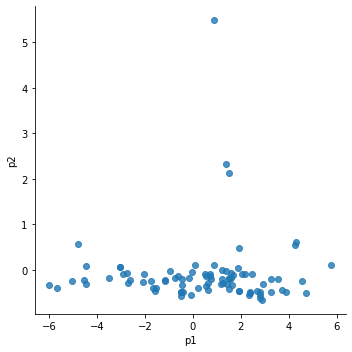

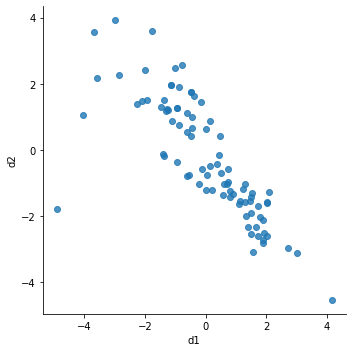

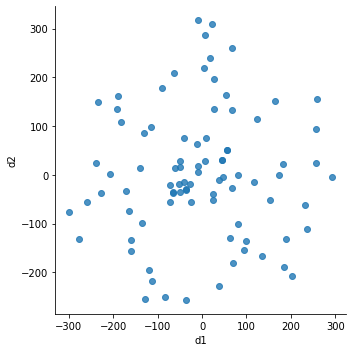

In [ ]:
sns.lmplot(data=Xp.sample(frac=0.1),x='p1',y='p2',fit_reg=False)
sns.lmplot(data=Xm.sample(frac=0.1),x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xt.sample(frac=0.1),x='d1',y='d2',fit_reg=False)

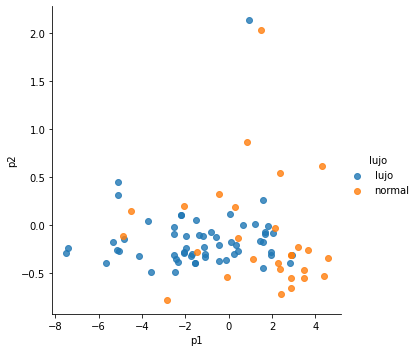

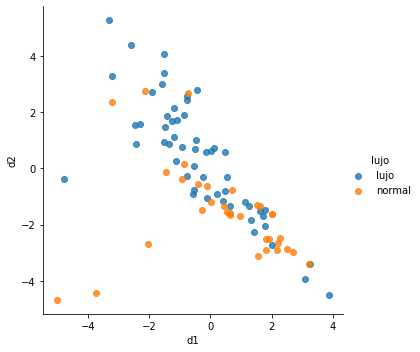

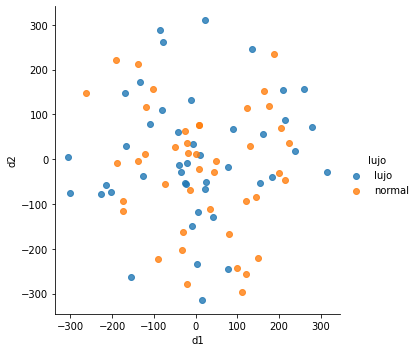

In [ ]:
sns.lmplot(data=Xp.sample(frac=0.1),x='p1',y='p2',fit_reg=False,hue='lujo')
sns.lmplot(data=Xm.sample(frac=0.1),x='d1',y='d2',fit_reg=False,hue='lujo')
sns.lmplot(data=Xt.sample(frac=0.1),x='d1',y='d2',fit_reg=False,hue='lujo')

In [ ]:
Xp.Marca

0          FORD
1          SEAT
2         MAZDA
3         MAZDA
4         MAZDA
         ...   
867    MERCEDES
868    MERCEDES
869        JEEP
870    MERCEDES
871    MERCEDES
Name: Marca, Length: 872, dtype: object

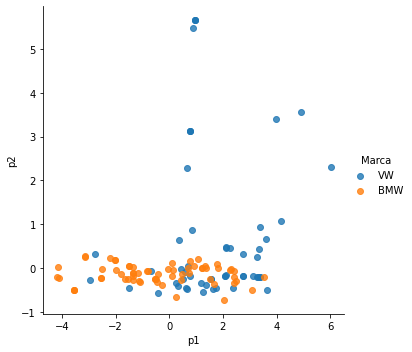

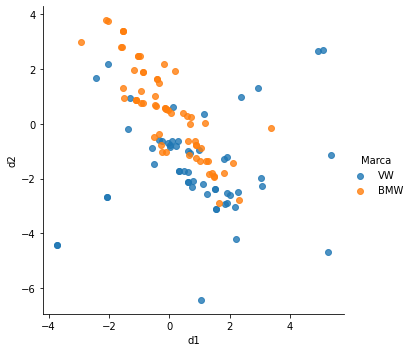

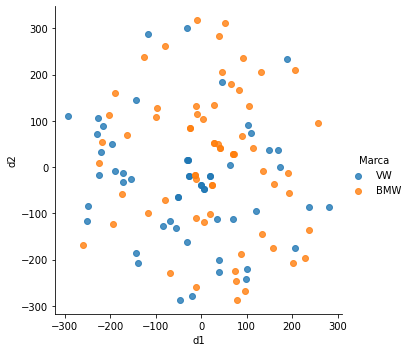

In [ ]:
sns.lmplot(data=Xp.loc[Xp.Marca.isin(['BMW','VW'])],x='p1',y='p2',fit_reg=False,hue='Marca')
sns.lmplot(data=Xm.loc[Xm.Marca.isin(['BMW','VW'])],x='d1',y='d2',fit_reg=False,hue='Marca')
sns.lmplot(data=Xt.loc[Xm.Marca.isin(['BMW','VW'])],x='d1',y='d2',fit_reg=False,hue='Marca')

In [ ]:
TSNE?